In [174]:
# ZhunleiZhou taught me many handy functions, and some materials form csdn inspired me.
# import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [175]:
# Promblem 1
# Read the file  as an object and name it Sig_Eqs.
Sig_Eqs = pd.read_csv('data.tsv', sep='\t')

# Check information
Sig_Eqs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Id                                  6398 non-null   float64
 2   Year                                6398 non-null   float64
 3   Mo                                  5989 non-null   float64
 4   Dy                                  5833 non-null   float64
 5   Hr                                  4346 non-null   float64
 6   Mn                                  4137 non-null   float64
 7   Sec                                 4361 non-null   float64
 8   Tsu                                 1979 non-null   float64
 9   Vol                                 77 non-null     float64
 10  Country                             6397 non-null   object 
 11  Area                                331 non

In [176]:
# Show header.head()
Sig_Eqs.head()

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [177]:
# 1.1
# calculate the sum of death for every country
deaths_for_country = Sig_Eqs.groupby('Country')['Deaths'].sum()
deaths_for_country

Country
AFGHANISTAN                             15644.0
ALBANIA                                  3132.0
ALGERIA                                 39339.0
ANTARCTICA                                  0.0
ANTIGUA AND BARBUDA                         0.0
                                         ...   
VENEZUELA                               44480.0
VIETNAM                                     0.0
WALLIS AND FUTUNA (FRENCH TERRITORY)        5.0
YEMEN                                    4192.0
ZAMBIA                                      0.0
Name: Deaths, Length: 156, dtype: float64

In [178]:
# sort and print the top ten
top_ten = deaths_for_country.sort_values(ascending=False).head(10)
print(top_ten)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


In [179]:
#1.2
# find out earthquakes with a magnitude larger than 6.0
strong_earthquake = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

<Axes: title={'center': 'Annual number of Earthquakes   with a magnitude larger than 6.0 '}, xlabel='Year'>

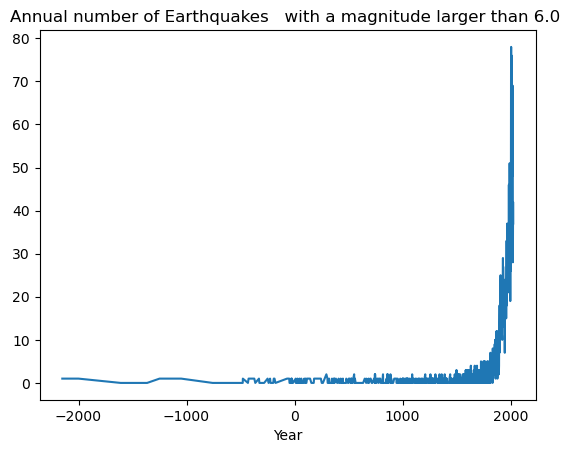

In [180]:
# count 
annual_earthquake = Sig_Eqs.groupby('Year')['Mag'].count()
annual_earthquake.plot(title='Annual number of Earthquakes   with a magnitude larger than 6.0 ')


In [181]:
#1.3
def CountEq_LargestEq(country):
    country_data = Sig_Eqs[Sig_Eqs['Country'] == country]
    
    #return the number of lines
    number = Sig_Eqs[Sig_Eqs['Country'] == country].shape[0]
    
    # find the maximum
    rank = country_data['Mag'].rank(ascending = False,method="min")
    
    # find the data corresponding to the maximum
    data = country_data.loc[rank == 1, ['Year', 'Mo', 'Dy']].reset_index(drop=True)
    data.index = data.index + 1
    data.insert(0, 'Number', number)
    data.insert(0, 'Country', country)
    
    return  data

In [210]:
#clear the nan
Sig_Eqs_nonan= Sig_Eqs.dropna(subset=['Country'])

# store the all result
Data = pd.DataFrame()

# apply the CountEq_LargestEq(country) to all countries
for Country in Sig_Eqs_nonan['Country'].unique():
    country_result = CountEq_LargestEq(Country)
    Data = pd.concat([Data, country_result])

Data_sorted=Data.sort_values('Number',ascending=False)
Data_sorted.reset_index(drop=True, inplace=True)
Data_sorted
Data_sorted['Rank'] = Data_sorted['Number'].rank(ascending=False, method='min')
Data_sorted



,Country,Number,Year,Mo,Dy,Rank
0,CHINA,620,1668.0,7.0,25.0,1.0
1,JAPAN,414,2011.0,3.0,11.0,2.0
2,INDONESIA,411,2004.0,12.0,26.0,3.0
3,IRAN,384,856.0,12.0,22.0,4.0
4,TURKEY,335,2023.0,2.0,6.0,5.0
...,...,...,...,...,...,...
164,CENTRAL AFRICAN REPUBLIC,1,1921.0,9.0,16.0,151.0
165,NORWAY,1,1819.0,8.0,31.0,151.0
166,PALAU,1,1914.0,10.0,23.0,151.0
167,FRENCH POLYNESIA,1,1848.0,7.0,12.0,151.0


In [183]:
# problem2
wind_data = pd.read_csv("2281305.csv")

C:\Users\malinqiang\AppData\Local\Temp\ipykernel_15044\2193020219.py:2: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_data = pd.read_csv("2281305.csv")


In [184]:
# check and extract the needed data
wind_data.info()
wind_date_need=wind_data[["DATE", "WND"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111984 entries, 0 to 111983
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   STATION            111984 non-null  int64 
 1   DATE               111984 non-null  object
 2   SOURCE             111984 non-null  int64 
 3   REPORT_TYPE        111984 non-null  object
 4   CALL_SIGN          111984 non-null  object
 5   QUALITY_CONTROL    111984 non-null  object
 6   AA1                6493 non-null    object
 7   AA2                1752 non-null    object
 8   AA3                490 non-null     object
 9   AJ1                12 non-null      object
 10  AY1                5889 non-null    object
 11  AY2                4384 non-null    object
 12  CALL_SIGN.1        111984 non-null  object
 13  CIG                111984 non-null  object
 14  DEW                111984 non-null  object
 15  ED1                423 non-null     object
 16  EQD                4

In [185]:
wind_date_need

,DATE,WND
0,2010-01-02T00:00:00,"040,1,N,0020,1"
1,2010-01-02T01:00:00,"999,9,V,0010,1"
2,2010-01-02T02:00:00,"999,9,C,0000,1"
3,2010-01-02T03:00:00,"140,1,N,0010,1"
4,2010-01-02T04:00:00,"300,1,N,0040,1"
...,...,...
111979,2020-09-11T17:00:00,"170,1,N,0030,1"
111980,2020-09-11T18:00:00,"180,1,N,0040,1"
111981,2020-09-11T19:00:00,"220,1,V,0030,1"
111982,2020-09-11T20:00:00,"260,1,N,0030,1"


In [186]:
# split wnd into five columns
new_columns = wind_date_need['WND'].str.split(',', expand=True)
new_columns.columns = ['direction', 'type', 'dir', 'speed','quality']
wind_date_need = pd.concat([wind_date_need, new_columns], axis=1) 

In [187]:
wind_date_need

,DATE,WND,direction,type,dir,speed,quality
0,2010-01-02T00:00:00,"040,1,N,0020,1",040,1,N,0020,1
1,2010-01-02T01:00:00,"999,9,V,0010,1",999,9,V,0010,1
2,2010-01-02T02:00:00,"999,9,C,0000,1",999,9,C,0000,1
3,2010-01-02T03:00:00,"140,1,N,0010,1",140,1,N,0010,1
4,2010-01-02T04:00:00,"300,1,N,0040,1",300,1,N,0040,1
...,...,...,...,...,...,...,...
111979,2020-09-11T17:00:00,"170,1,N,0030,1",170,1,N,0030,1
111980,2020-09-11T18:00:00,"180,1,N,0040,1",180,1,N,0040,1
111981,2020-09-11T19:00:00,"220,1,V,0030,1",220,1,V,0030,1
111982,2020-09-11T20:00:00,"260,1,N,0030,1",260,1,N,0030,1


In [188]:
# data filter
drop_data = wind_date_need[(wind_date_need['dir'] == '9') & (wind_date_need['speed'] != '0000')]
wind_date_need = wind_date_need.drop(drop_data.index)
drop_data = wind_date_need[(wind_date_need['speed'] == '9999')]
wind_date_need = wind_date_need.drop(drop_data.index)
drop_data = wind_date_need[(wind_date_need['quality'] != '1') & (wind_date_need['quality'] != '5')] 
wind_date_need = wind_date_need.drop(drop_data.index)
wind_date_need

,DATE,WND,direction,type,dir,speed,quality
0,2010-01-02T00:00:00,"040,1,N,0020,1",040,1,N,0020,1
1,2010-01-02T01:00:00,"999,9,V,0010,1",999,9,V,0010,1
2,2010-01-02T02:00:00,"999,9,C,0000,1",999,9,C,0000,1
3,2010-01-02T03:00:00,"140,1,N,0010,1",140,1,N,0010,1
4,2010-01-02T04:00:00,"300,1,N,0040,1",300,1,N,0040,1
...,...,...,...,...,...,...,...
111979,2020-09-11T17:00:00,"170,1,N,0030,1",170,1,N,0030,1
111980,2020-09-11T18:00:00,"180,1,N,0040,1",180,1,N,0040,1
111981,2020-09-11T19:00:00,"220,1,V,0030,1",220,1,V,0030,1
111982,2020-09-11T20:00:00,"260,1,N,0030,1",260,1,N,0030,1


In [211]:
# transform speed from str to number and add a column month
wind_date_need['SPEED'] = pd.to_numeric(wind_date_need['speed'], errors='coerce')
wind_date_need['month'] = pd.to_datetime(wind_date_need['DATE']).dt.month
wind_date_need['SPEED'] = wind_date_need['SPEED'].astype(float)
wind_date_need

,DATE,WND,direction,type,dir,speed,quality,SPEED,month
0,2010-01-02T00:00:00,"040,1,N,0020,1",040,1,N,0020,1,20.0,1
1,2010-01-02T01:00:00,"999,9,V,0010,1",999,9,V,0010,1,10.0,1
2,2010-01-02T02:00:00,"999,9,C,0000,1",999,9,C,0000,1,0.0,1
3,2010-01-02T03:00:00,"140,1,N,0010,1",140,1,N,0010,1,10.0,1
4,2010-01-02T04:00:00,"300,1,N,0040,1",300,1,N,0040,1,40.0,1
...,...,...,...,...,...,...,...,...,...
111979,2020-09-11T17:00:00,"170,1,N,0030,1",170,1,N,0030,1,30.0,9
111980,2020-09-11T18:00:00,"180,1,N,0040,1",180,1,N,0040,1,40.0,9
111981,2020-09-11T19:00:00,"220,1,V,0030,1",220,1,V,0030,1,30.0,9
111982,2020-09-11T20:00:00,"260,1,N,0030,1",260,1,N,0030,1,30.0,9


<Axes: xlabel='month'>

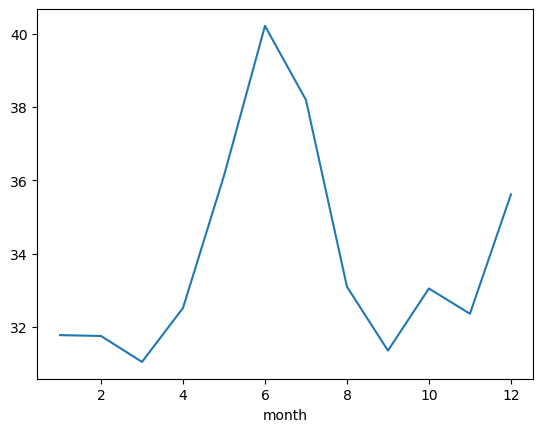

In [190]:
mean_speed_monthly = wind_date_need.groupby('month')['SPEED'].mean()
mean_speed_monthly
mean_speed_monthly.plot()

In [215]:
#problem3
Climate_data = pd.read_csv('2003-climate.csv')
Climate_data

,year,month,day,hour,miniute,Temperature1,Temperature2,VaporPressure1,VaporPressure2,ShortwavRadiation,AverageNetRadiation,SoilTemperature,WaterContent2,Total Precipitation
0,2003,1,1,0,0,-18.74,-19.80,0.066,0.065,0.261,0.0,-8.870,0.067,0.0
1,2003,1,1,0,30,-18.44,-18.89,0.069,0.070,0.004,0.0,-9.040,0.066,0.0
2,2003,1,1,1,0,-20.12,-20.57,0.064,0.063,0.000,0.0,-9.180,0.066,0.0
3,2003,1,1,1,30,-18.33,-20.11,0.069,0.065,0.014,0.0,-9.330,0.066,0.0
4,2003,1,1,2,0,-18.43,-20.18,0.069,0.067,0.454,0.0,-9.470,0.066,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2003,12,31,21,30,-12.55,-12.52,0.176,0.183,0.000,0.0,-5.305,0.070,0.0
17516,2003,12,31,22,0,-13.19,-13.19,0.167,0.173,0.000,0.0,-5.375,0.070,0.0
17517,2003,12,31,22,30,-13.80,-13.77,0.158,0.164,0.000,0.0,-5.440,0.070,0.0
17518,2003,12,31,23,0,-14.37,-14.34,0.150,0.157,0.000,0.0,-5.496,0.070,0.0


In [213]:
# check if nan exist
nan_count = Climate_data['Temperature1'].count()
nan_count

17520

In [217]:

#check and find the max record 
max_indices = Climate_data[Climate_data['Temperature1'] == Climate_data['Temperature1'].max()].index
max_rows =Climate_data.loc[max_indices]
max_rows


,year,month,day,hour,miniute,Temperature1,Temperature2,VaporPressure1,VaporPressure2,ShortwavRadiation,AverageNetRadiation,SoilTemperature,WaterContent2,Total Precipitation
9825,2003,7,24,16,30,21.04,21.51,1.076,1.128,754.1,1344.79,18.26,0.239,0.0


In [196]:
#check and find the min record
min_indices = Climate_data[Climate_data['Temperature1'] == Climate_data['Temperature1'].min()].index
min_rows =Climate_data.loc[min_indices]
min_rows

,year,month,day,hour,miniute,Temperature1,Temperature2,VaporPressure1,VaporPressure2,ShortwavRadiation,AverageNetRadiation,SoilTemperature,WaterContent2,Total Precipitation
1261,2003,1,27,6,30,-28.66,-29.45,0.024,0.024,0.0,0.0,-12.27,0.062,0.0


In [197]:
#find the median
median = Climate_data['Temperature1'].median()
median



-0.5345

In [198]:
#find the mean
median = Climate_data['Temperature1'].mean()
median

-1.2706185977645548

In [199]:
std = Climate_data['Temperature1'].std()
std


9.69260291365657

<Axes: xlabel='month'>

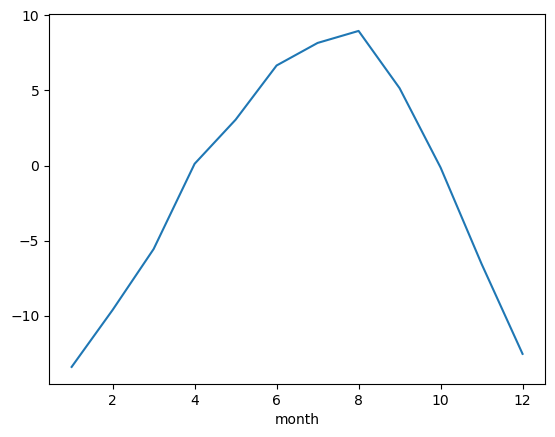

In [216]:
mean_temperature1_monthly = Climate_data.groupby('month')['Temperature1'].mean()
mean_temperature1_monthly
mean_temperature1_monthly.plot()